In [1]:
import praw
import pandas as pd
import numpy as np
import re
import string
import nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tag import pos_tag, pos_tag_sents
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('vader_lexicon')
#nltk.download('omw-1.4')

In [3]:
df = pd.read_csv('Clustering Data.csv',index_col = False)

In [4]:
df.head()

,Unnamed: 0,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,Cluster,PCA1,PCA2
0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.546980,-0.066286
1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",0,-0.114996,-0.031873
2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",0,-0.114996,-0.031873
3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",0,-0.178261,-0.125401
4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.393936,-0.019660


In [5]:
df = df.rename(columns={'Unnamed: 0': 'Index'})

In [6]:
df.head()

,Index,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,Cluster,PCA1,PCA2
0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.546980,-0.066286
1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",0,-0.114996,-0.031873
2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",0,-0.114996,-0.031873
3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",0,-0.178261,-0.125401
4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.393936,-0.019660


In [7]:
a = df['Original_Title'][0]

In [8]:
print(a)

Apple Vision Pro has ruined movies for me


In [9]:
tokens = nltk.word_tokenize(a)

In [10]:
tagged = nltk.pos_tag(tokens)

In [11]:
tagged

[('Apple', 'NNP'),
 ('Vision', 'NNP'),
 ('Pro', 'NNP'),
 ('has', 'VBZ'),
 ('ruined', 'VBN'),
 ('movies', 'NNS'),
 ('for', 'IN'),
 ('me', 'PRP')]

In [12]:
# Chunking the data

In [13]:
entities = nltk.chunk.ne_chunk(tagged)

In [14]:
entities.pprint()

(S
  (PERSON Apple/NNP)
  (PERSON Vision/NNP Pro/NNP)
  has/VBZ
  ruined/VBN
  movies/NNS
  for/IN
  me/PRP)


In [15]:
# Implementing VADER model for finding the sentiment

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores(a)

{'neg': 0.279, 'neu': 0.541, 'pos': 0.18, 'compound': -0.2732}

In [19]:
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text = row['Original_Title']
    myid= row['Index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/60 [00:00<?, ?it/s]

In [20]:
res

{0: {'neg': 0.279, 'neu': 0.541, 'pos': 0.18, 'compound': -0.2732},
 1: {'neg': 0.61, 'neu': 0.39, 'pos': 0.0, 'compound': -0.5719},
 2: {'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'compound': -0.5859},
 3: {'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.6281},
 4: {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.7351},
 5: {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25},
 6: {'neg': 0.162, 'neu': 0.602, 'pos': 0.236, 'compound': 0.3818},
 7: {'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'compound': -0.3566},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 10: {'neg': 0.444, 'neu': 0.278, 'pos': 0.278, 'compound': -0.296},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369},
 13: {'neg': 0.195, 'neu': 0.575, 'pos': 0.23, 'compound': 0.0772},
 14: {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0763},
 15: {'neg': 0.0, 'ne

In [21]:
polarity_Scores = pd.DataFrame(res).T

In [22]:
polarity_Scores.head()

,neg,neu,pos,compound
0,0.279,0.541,0.18,-0.2732
1,0.610,0.390,0.00,-0.5719
2,0.432,0.568,0.00,-0.5859
3,0.205,0.795,0.00,-0.6281
4,0.000,0.640,0.36,0.7351


In [23]:
import pandas as pd

# Define the function classify_sentiment
def classify_sentiment(df):
    """
    Classifies sentiment labels based on compound scores in a DataFrame.

    Parameters:
        df (DataFrame): DataFrame containing compound scores.

    Returns:
        DataFrame: DataFrame with additional column 'Sentiment' containing sentiment labels.
    """
    def get_sentiment(compound_score):
        if compound_score > 0.05:
            return 1
        elif compound_score < -0.05:
            return -1
        else:
            return 0

    df['Sentiment'] = df['compound'].apply(get_sentiment)
    return df

In [24]:
# Classify sentiment using the provided function
df_with_sentiment = classify_sentiment(polarity_Scores)
print(df_with_sentiment)

      neg    neu    pos  compound  Sentiment
0   0.279  0.541  0.180   -0.2732         -1
1   0.610  0.390  0.000   -0.5719         -1
2   0.432  0.568  0.000   -0.5859         -1
3   0.205  0.795  0.000   -0.6281         -1
4   0.000  0.640  0.360    0.7351          1
5   0.000  0.875  0.125    0.2500          1
6   0.162  0.602  0.236    0.3818          1
7   0.292  0.708  0.000   -0.3566         -1
8   0.000  1.000  0.000    0.0000          0
9   0.000  1.000  0.000    0.0000          0
10  0.444  0.278  0.278   -0.2960         -1
11  0.000  1.000  0.000    0.0000          0
12  0.000  0.543  0.457    0.6369          1
13  0.195  0.575  0.230    0.0772          1
14  0.000  0.822  0.178    0.0763          1
15  0.000  0.620  0.380    0.5093          1
16  0.333  0.667  0.000   -0.4588         -1
17  0.000  1.000  0.000    0.0000          0
18  0.000  1.000  0.000    0.0000          0
19  0.000  1.000  0.000    0.0000          0
20  0.000  1.000  0.000    0.0000          0
21  0.000 

In [25]:
sum(df_with_sentiment['Sentiment'])

12

In [26]:
from statistics import mean
 
mean(df_with_sentiment['Sentiment'])

0.2

In [27]:
print(df_with_sentiment.dtypes)

neg          float64
neu          float64
pos          float64
compound     float64
Sentiment      int64
dtype: object


# Implementing Naive Bias

In [28]:
df2 = pd.DataFrame(df_with_sentiment)

In [29]:
df2.head()

,neg,neu,pos,compound,Sentiment
0,0.279,0.541,0.18,-0.2732,-1
1,0.610,0.390,0.00,-0.5719,-1
2,0.432,0.568,0.00,-0.5859,-1
3,0.205,0.795,0.00,-0.6281,-1
4,0.000,0.640,0.36,0.7351,1


In [30]:
df['neg']= df_with_sentiment['neg']
df['neu']= df_with_sentiment['neu']
df['pos']= df_with_sentiment['pos']
df['compound']= df_with_sentiment['compound']
df['Sentiment']= df_with_sentiment['Sentiment']

In [31]:
df.head()

,Index,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,Cluster,PCA1,PCA2,neg,neu,pos,compound,Sentiment
0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.546980,-0.066286,0.279,0.541,0.18,-0.2732,-1
1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",0,-0.114996,-0.031873,0.610,0.390,0.00,-0.5719,-1
2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",0,-0.114996,-0.031873,0.432,0.568,0.00,-0.5859,-1
3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",0,-0.178261,-0.125401,0.205,0.795,0.00,-0.6281,-1
4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.393936,-0.019660,0.000,0.640,0.36,0.7351,1


In [32]:
def label_sentiment(compound):
    if compound >= 0:
        return 'positive'
    else:
        return 'negative'

# Apply the sentiment labels
df['Sentiment_Label'] = df['compound'].apply(label_sentiment)

In [33]:
df.head()

,Index,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,Cluster,PCA1,PCA2,neg,neu,pos,compound,Sentiment,Sentiment_Label
0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.546980,-0.066286,0.279,0.541,0.18,-0.2732,-1,negative
1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",0,-0.114996,-0.031873,0.610,0.390,0.00,-0.5719,-1,negative
2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",0,-0.114996,-0.031873,0.432,0.568,0.00,-0.5859,-1,negative
3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",0,-0.178261,-0.125401,0.205,0.795,0.00,-0.6281,-1,negative
4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",2,0.393936,-0.019660,0.000,0.640,0.36,0.7351,1,positive


In [34]:
df.to_csv('Sentiment_Analysis_Data.csv')

In [35]:
# Split the data into features (X) and labels (y)
X = df['Lemmatized_Words']
y = df['Sentiment_Label']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train_df = pd.DataFrame(X_train)

In [38]:
X_train_df

,Lemmatized_Words
31,"['telling', 'people']"
3,"['really', 'wrong', 'avp', 'incredible', 'piec..."
52,"['feels', 'like', 'start', 'technodystopian', ..."
17,"['multiple', 'displays', 'coming', 'avp']"
8,"['forgetting', 'body']"
6,"['breaking', 'news', 'local', 'man', 'paralyze..."
40,"['cant', 'vision', 'pro']"
4,"['apple', 'vision', 'pro', 'best', 'thing', 'h..."
43,['painless']
19,"['know', 'mean']"


In [39]:
X_test_df = pd.DataFrame(X_test)

In [40]:
X_test_df

,Lemmatized_Words
0,"['apple', 'vision', 'pro', 'ruined', 'movies']"
5,"['posting', 'say', 'vision', 'pro', 'since', '..."
36,"['vision', 'pro', 'games', 'heres']"
45,"['would', 'cool', 'immersion', 'environment', ..."
13,"['obsessed', 'vision', 'pro']"
54,['beta']
33,"['please', 'give', 'lidar', 'view', 'sneak', '..."
48,"['guest', 'mode', 'sucks', 'need', 'true', 'mu..."
12,"['best', 'new', 'product', 'ive', 'ever', 'seen']"
57,"['watching', 'reviews']"


In [41]:
X_test.to_csv('X_test.csv')

In [42]:
X_train.shape

(48,)

In [43]:
X_test.shape

(12,)

In [44]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [45]:
alpha = 1.0
clf = MultinomialNB(alpha=alpha)
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [46]:
# Evaluate the classifier
y_pred = clf.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [47]:
precision = precision_score(y_test, y_pred, pos_label='positive')
print("Precision:", precision)

Precision: 0.75


In [48]:
# Calculate recall
recall = recall_score(y_test, y_pred, pos_label='positive')
print("Recall:", recall)

Recall: 1.0


In [49]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label='positive')
print("F1 Score:", f1)

F1 Score: 0.8571428571428571


In [50]:
# Example of predicting sentiment of a new text
new_text = "I loved the Apple Vision Pro"
print("New Comment: ",new_text)
new_text_processed = " ".join(new_text.split())  # Remove extra spaces if any
new_text_counts = vectorizer.transform([new_text_processed])
predicted_sentiment = clf.predict(new_text_counts)[0]
print("Predicted Sentiment:", predicted_sentiment)

New Comment:  I loved the Apple Vision Pro
Predicted Sentiment: positive


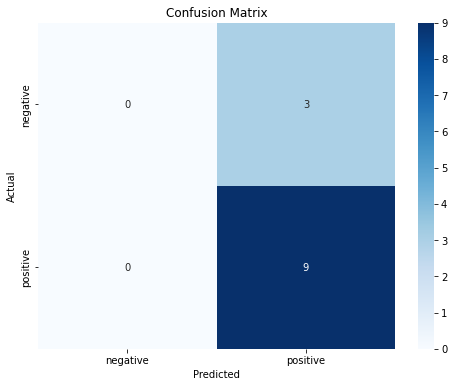

In [51]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()